In [2]:
# Pandas for managing datasets
import pandas as pd

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns


In [3]:
# Read dataset
df = pd.read_csv('Pokemon.csv', index_col=0, encoding='latin')

In [4]:
# Display first 5 observations
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


# Seaborn’s Plotting Functions
One of Seaborn’s greatest strengths is its diversity of plotting functions. For instance, making a scatter plot is just one line of code using the `lmplot()` function.

There are two ways you can do so.

- The first way (recommended) is to pass your DataFrame to the data= argument, while passing column names to the axes arguments, x= and y=.
- The second way is to directly pass in Series of data to the axes arguments.


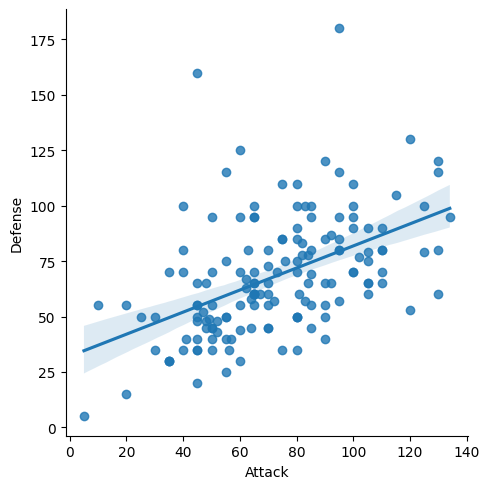

In [5]:
# Recommended way
sns.lmplot(x='Attack', y='Defense', data=df)

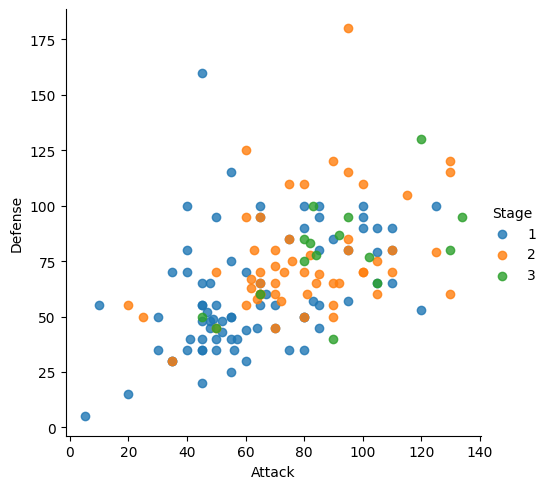

In [6]:
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage

<Axes: xlabel='Attack', ylabel='Defense'>

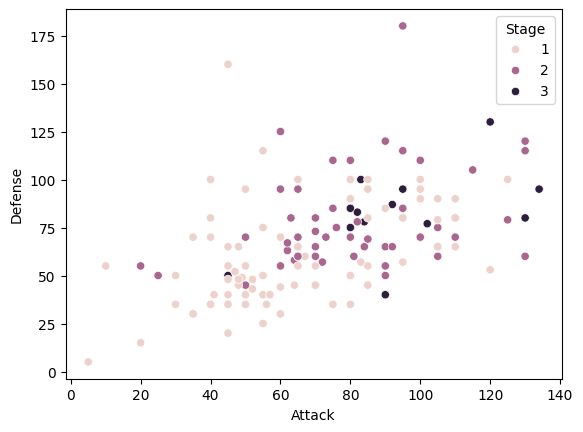

In [7]:
# Recommended way
sns.scatterplot(x='Attack', y='Defense', data=df, hue='Stage')

# Customizing with Matplotlib
1. First, invoke your Seaborn plotting function as normal.
2. Then, invoke Matplotlib’s customization functions. In this case, we’ll use its ylim() and xlim() functions.

(0.0, 200.0)

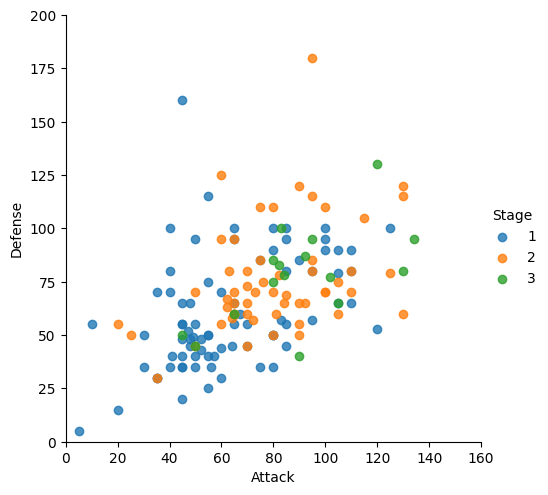

In [8]:
# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False,
           hue='Stage')
 
# Tweak using Matplotlib
plt.xlim(0, 160)
plt.ylim(0, 200)

# The Role of Pandas
 Seaborn’s plotting functions benefit from a base DataFrame that’s reasonably formatted.

For example, let’s say we wanted to make a box plot for our Pokémon’s combat stats (we’ll also run the code plt.figure(figsize=(9,6)) to make the plot larger and more legible):

<Axes: >

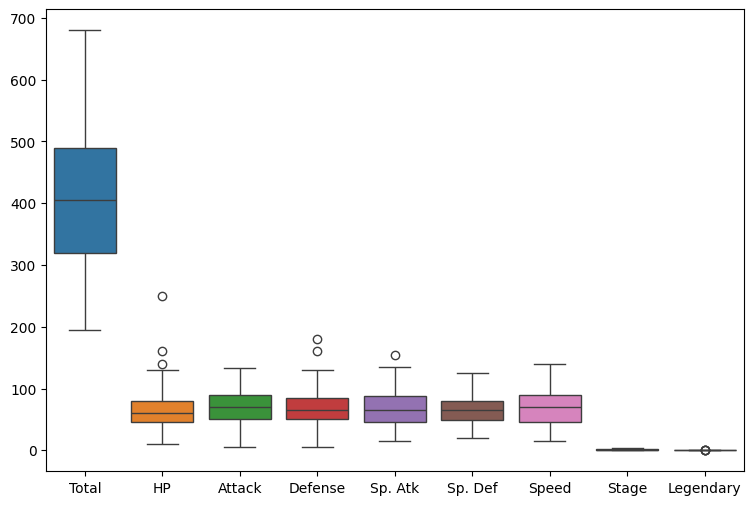

In [9]:
# Boxplot
plt.figure(figsize=(9,6)) # Set plot dimensions
sns.boxplot(data=df)

<Axes: >

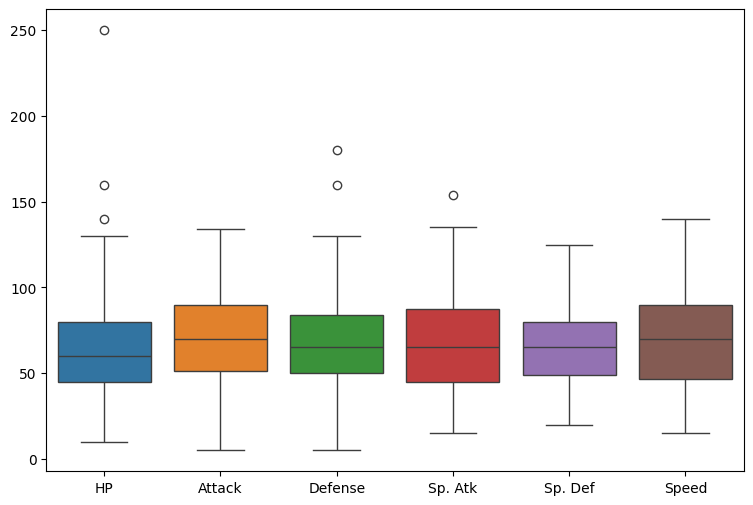

In [10]:
# Preprocess DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
plt.figure(figsize=(9,6)) # Set plot dimensions
sns.boxplot(data=stats_df)

# Seaborn Themes

<Axes: xlabel='Type 1', ylabel='Attack'>

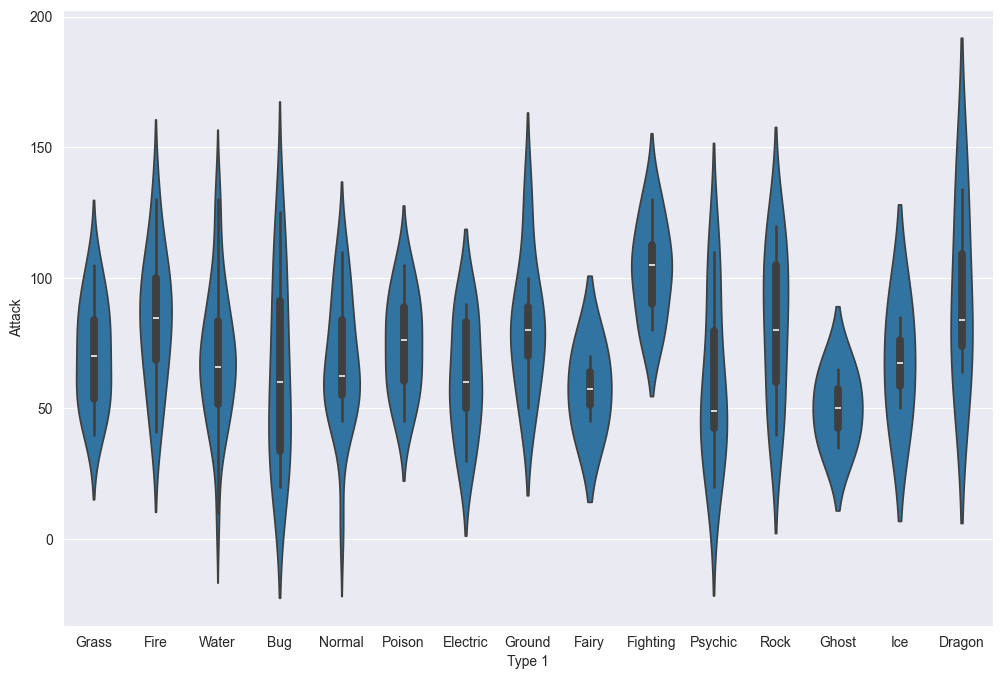

In [11]:
# Set theme
sns.set_style('darkgrid')
 
# Violin plot
plt.figure(figsize=(12,8)) # Set plot dimensions
sns.violinplot(x='Type 1', y='Attack', data=df)

# Color Palettes

In [12]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

C:\Users\ricar\AppData\Local\Temp\ipykernel_32144\1095032109.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors) # Set color palette


<Axes: xlabel='Type 1', ylabel='Attack'>

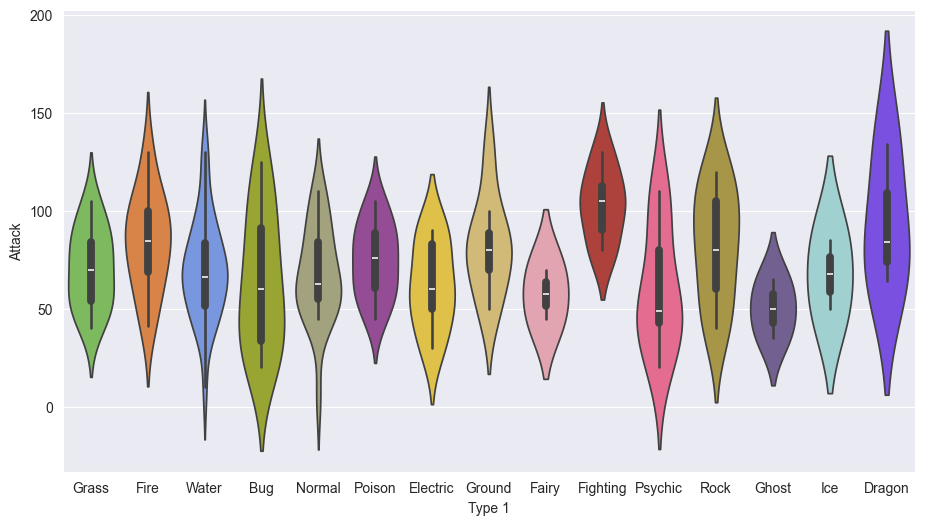

In [13]:
# Violin plot with Pokemon color palette
plt.figure(figsize=(11,6)) # Set plot dimensions

sns.violinplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors) # Set color palette

C:\Users\ricar\AppData\Local\Temp\ipykernel_32144\3722906728.py:5: UserWarning: The palette list has more values (15) than needed (3), which may not be intended.
  sns.swarmplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors, hue='Stage')


<Axes: xlabel='Type 1', ylabel='Attack'>

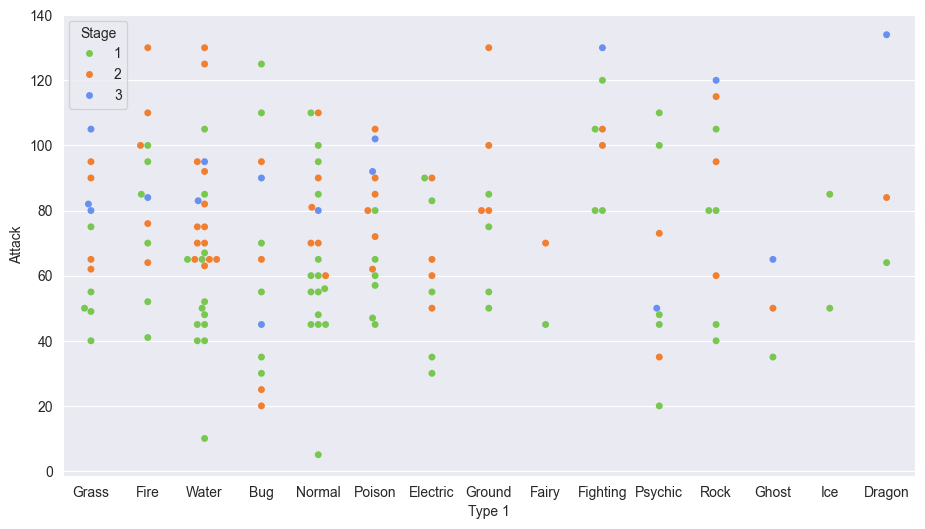

In [14]:
# since we only have 151 Pokémon in our dataset, we may want to simply display each point.

# Swarm plot with Pokemon color palette
plt.figure(figsize=(11,6)) # Set plot dimensions
sns.swarmplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors, hue='Stage')

# Overlaying Plots
1. First, we’ll make our figure larger using Matplotlib.
2. Then, we’ll plot the violin plot. However, we’ll set inner=None to remove the bars inside the violins.
3. Next, we’ll plot the swarm plot. This time, we’ll make the points black so they pop out more.
4. Finally, we’ll set a title using Matplotlib.

C:\Users\ricar\AppData\Local\Temp\ipykernel_32144\1035124393.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Type 1',


Text(0.5, 1.0, 'Attack by Type')

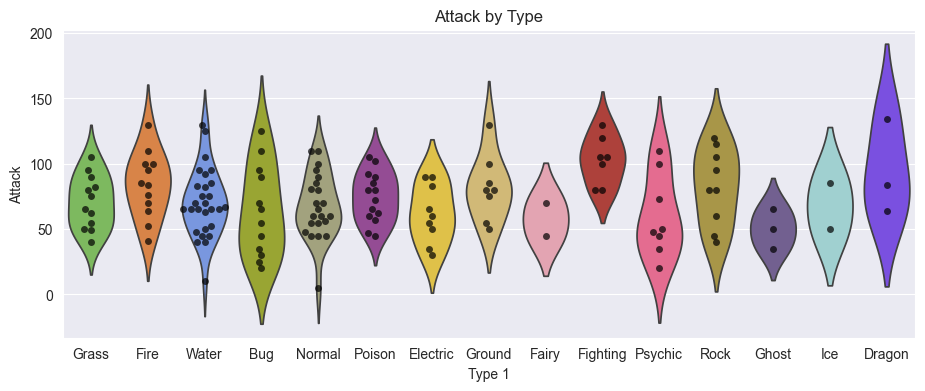

In [15]:
# Set figure size with matplotlib
plt.figure(figsize=(11,4))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

# Putting It All Together

In [16]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


In [17]:
# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [18]:
# print the shape of these two DataFrames
print( stats_df.shape )
print( melted_df.shape )

(151, 9)
(906, 5)


Now we can make a swarm plot with melted_df.

- This time, we’re going to set x='Stat' and y='value' so our swarms are separated by stat.
- Then, we’ll set hue='Type 1' to color our points by the Pokémon type.

d:\Program Files\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Program Files\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 11.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Program Files\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Program Files\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Stat', ylabel='value'>

d:\Program Files\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 23.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Program Files\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Program Files\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Program Files\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 18.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Program Files\Python\Python312\Lib\site-packages\seaborn\categori

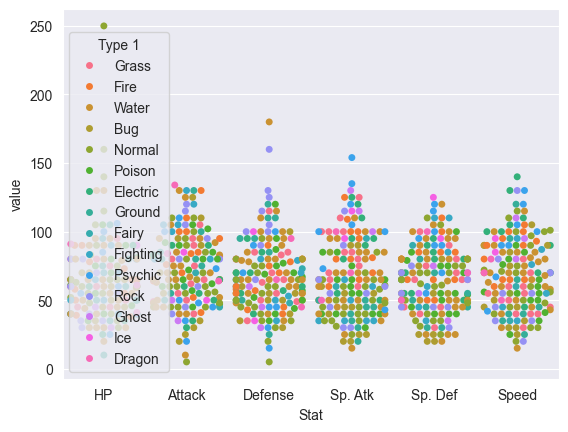

In [19]:
# Swarmplot with melted_df
sns.swarmplot(x='Stat', y='value', data=melted_df, hue='Type 1', legend='brief')

Finally, let’s make a few final tweaks for a more readable chart:
1. Enlarge the plot.
2. Separate points by hue using the argument dodge=True .
3. Use our custom Pokemon color palette.
4. Adjust the y-axis limits to end at 0.
5. Plce the legend to the right.

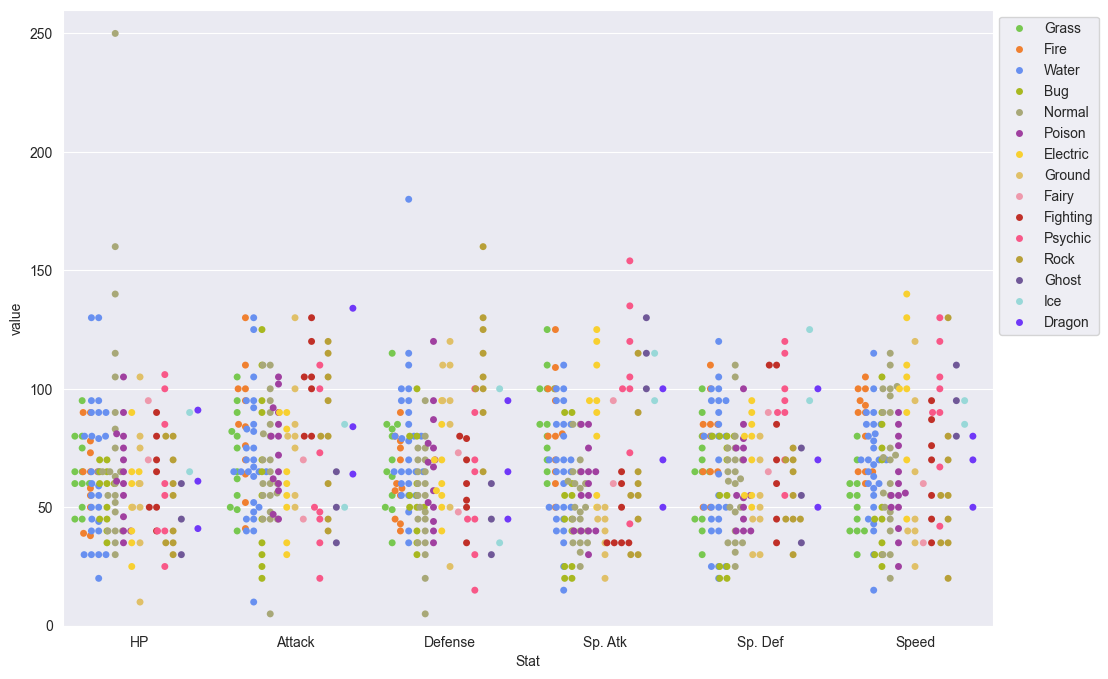

In [20]:
# 1. Enlarge the plot
plt.figure(figsize=(12,8))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              dodge=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Pokédex (Mini-Gallery)

**Heatmap**

Heatmaps help you visualize matrix-like data.

In [21]:
# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
plt.figure(figsize=(9,8))
sns.heatmap(corr)

ValueError: could not convert string to float: 'Bulbasaur'

**Histogram**

Histograms allow you to plot the distributions of numeric variables.

In [ ]:
# Distribution Plot (a.k.a. Histogram)
plt.figure(figsize=(9,6))
sns.histplot(df, x='Attack',
             kde=True) # Plot the density curve too

**Bar Plot**

Bar plots help you visualize the distributions of categorical variables.

In [ ]:
df.head()

In [ ]:
df.groupby(['Type 1']).count()

In [ ]:
# Count Plot (a.k.a. Bar Plot)
plt.figure(figsize=(9,6))
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

**CatPlot (Categorical Plot)**

CatPlots make it easy to separate plots by categorical classes.

In [ ]:
# Categorical Plot
g = sns.catplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45) 

**Density Plot**
Density plots display the distribution between two variables.
>Tip: Consider overlaying this with a scatter plot.

In [ ]:
# Density Plot
sns.kdeplot(x='Attack', y='Defense', data=df)

**Joint Distribution Plot**

Joint distribution plots combine information from scatter plots and histograms to give you detailed information for bi-variate distributions.

In [ ]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df)